In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

mtcars = pd.read_csv('mtcars.csv')


mtcars_mpg = mtcars.sort_values("mpg", ascending = False)
print("5 auta s najvecom potrosnjom:\n")
print(mtcars_mpg[["car"]].head(5))
print("\n\n")


mtcars_cyl8 = mtcars[mtcars["cyl"] == 8]
mtcars_cyl8 = mtcars_cyl8.sort_values("mpg", ascending = True)
print("auti s 8 cilindara koji imaju najmanju potrosnju:\n")
print(mtcars_cyl8[["car"]].head(8))
print("\n\n")


mtcars_cyl6 = mtcars[mtcars["cyl"] == 6]
print("srednja potrosnja automobila sa 6 cilindara:\n")
print(mtcars_cyl6["mpg"].mean())
print("\n\n")


mtcars_cyl4 = mtcars[mtcars["cyl"] == 4]
mtcars_cyl4 = mtcars_cyl4[mtcars_cyl4["wt"] >= 2.0]
mtcars_cyl4 = mtcars_cyl4[mtcars_cyl4["wt"] <= 2.2]
print("srednja potrosnja automobila s 4 cilindra i tezinom izmedu 2000 i 2200 lbs:\n")
print(mtcars_cyl4["mpg"].mean())
print("\n\n")


mtcars_a = mtcars[mtcars["am"] == 0]
mtcars_r = mtcars[mtcars["am"] == 1]
print("broj automobila s automatskim i rucnim mjenjacem:\n")
print(len(mtcars_a))
print(len(mtcars_r))
print("\n\n")


mtcars_a = mtcars_a[mtcars_a["hp"] > 100]
print("broj automobila s automatskim mjenjacem preko 100 konja:\n")
print(len(mtcars_a))
print("\n\n")


mtcars_kg = mtcars.copy()
mtcars_kg["wt"] = mtcars_kg["wt"] * 0.45359 * 1000
print("masa svakog automobila u kilogramima\n")
print(mtcars_kg[["car", "wt"]])


FileNotFoundError: ignored

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

mtcars = pd.read_csv('mtcars.csv')


mtcars4 = mtcars[mtcars["cyl"] == 4]
mpg4 = mtcars4["mpg"].mean()

mtcars6 = mtcars[mtcars["cyl"] == 6]
mpg6 = mtcars6["mpg"].mean()

mtcars8 = mtcars[mtcars["cyl"] == 8]
mpg8 = mtcars8["mpg"].mean()

mpgDataCyl = {"cyl": [4, 6, 8], "mpg": [mpg4, mpg6, mpg8]}
mpgCyl = pd.DataFrame(mpgDataCyl, columns = ["cyl", "mpg"])
mpgCyl.plot.bar(x="cyl", y="mpg")

wtData = {"4": mtcars4["wt"], "6": mtcars6["wt"], "8": mtcars8["wt"]}
wtCyl = pd.DataFrame(wtData, columns = ["4", "6", "8"])
wtCyl.plot.box()


mtcarsA = mtcars[mtcars["am"] == 0]
mtcarsR = mtcars[mtcars["am"] == 1]

mpgA = mtcarsA["mpg"].mean()
mpgR = mtcarsR["mpg"].mean()

mpgDataAm = {"am": [0, 1], "mpg": [mpgA, mpgR]}
mpgAm = pd.DataFrame(mpgDataAm, columns = ["am", "mpg"])
mpgAm.plot.bar(x = "am", y = "mpg")


colors = np.where(mtcars["am"]==1,'r','b')
mtcars.plot.scatter(x="hp", y="qsec", c = colors)
plt.legend("1")


FileNotFoundError: ignored

Tri datuma kada je koncentracija PM10 najveća: 
20   2017-01-21 23:00:00+00:00
19   2017-01-20 23:00:00+00:00
28   2017-01-29 23:00:00+00:00
Name: vrijeme, dtype: datetime64[ns, UTC]


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different len

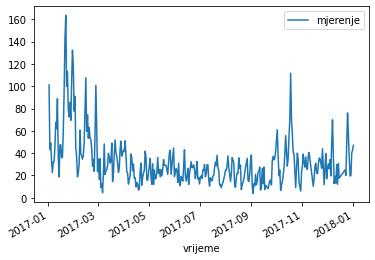

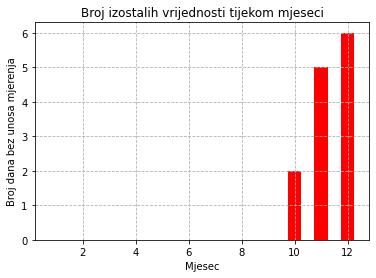

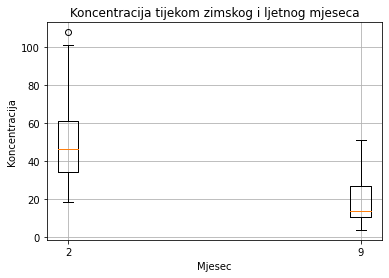

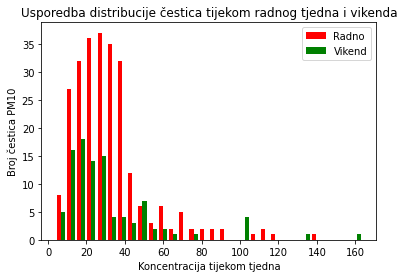

In [ ]:
import urllib.request
import pandas as pd
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import numpy as np

url = "http://iszz.azo.hr/iskzl/rs/podatak/export/xml?postaja=160&polutant=5&tipPodatka=5&vrijemeOd=02.01.2017&vrijemeDo=01.01.2018"

airQualityHR = urllib.request.urlopen(url).read()
root = ET.fromstring(airQualityHR)

df = pd.DataFrame(columns=('mjerenje', 'vrijeme'))

i = 0
children = list(root)
while True:
    try:
        
        obj = list(children[i])
    except:
        break
        
    row = dict(zip(['mjerenje', 'vrijeme'], [obj[0].text, obj[2].text]))
    row_s = pd.Series(row)
    row_s.name = i
    df = df.append(row_s)
    df.mjerenje[i] = float(df.mjerenje[i])
    i = i + 1
df.vrijeme = pd.to_datetime(df.vrijeme,utc=True)
df.plot(y='mjerenje', x='vrijeme');


df['month'] = pd.DatetimeIndex(df['vrijeme']).month
df['dayOfweek'] = pd.DatetimeIndex(df['vrijeme']).dayofweek



ThreeBiggestPM10ByYear = df.sort_values(by=['mjerenje'], ascending = False)
print("Tri datuma kada je koncentracija PM10 najveća: ")
print(ThreeBiggestPM10ByYear['vrijeme'].head(3))



index=np.arange(1,13,1)
prazni=[]
for i in range(1,13):   
    mjesec= df[df.month==i]
    if (i==1) or (i==3) or(i==5) or(i==7) or (i==8) or (i==10) or (i==12):
        prazni.append(31-len(mjesec))  
    elif (i==4) or (i==6) or(i==9) or(i==11):
        prazni.append(30-len(mjesec))  
    else:
        prazni.append(28-len(mjesec)) 

plt.figure()
plt.bar(index,prazni,0.5,color=(1,0,0))  
plt.title("Broj izostalih vrijednosti tijekom mjeseci")
plt.xlabel("Mjesec")
plt.ylabel("Broj dana bez unosa mjerenja")
plt.grid(linestyle="--")


veljaca=df[df.month==2]
rujan=df[df.month==9]
veljacaData= []
rujanData = []

for i in veljaca['mjerenje']:
    veljacaData.append(i)
for i in rujan['mjerenje']:
    rujanData.append(i)
    
plt.figure()
plt.boxplot([veljacaData, rujanData], positions = [2,9]) 
plt.title("Koncentracija tijekom zimskog i ljetnog mjeseca")
plt.xlabel('Mjesec')
plt.ylabel('Koncentracija')
plt.grid(linestyle='-')



radni_tj=[]
vikend_tj=[]
radni = df[(df.dayOfweek == 0)|(df.dayOfweek == 1)|(df.dayOfweek == 2)|(df.dayOfweek == 3)|(df.dayOfweek == 4)]
vikend = df[(df.dayOfweek == 5)|(df.dayOfweek == 6)]
for i in vikend['mjerenje']:
    vikend_tj.append(i)
for i in radni['mjerenje']:
    radni_tj.append(i)
    
bins=30
plt.figure()
plt.hist([radni_tj,vikend_tj],bins,color = ['red','green'])
plt.title("Usporedba distribucije čestica tijekom radnog tjedna i vikenda")
plt.xlabel("Koncentracija tijekom tjedna")
plt.ylabel("Broj čestica PM10")
plt.legend(['Radno','Vikend'],loc=1)
